# Lesson 12: EDA

En el EDA la gracia es hipotetizar.  
Encontrar Patrones.  
Ver que podria estar relacionado con que. 

Haremos hipotesis, y luego golpearla con distintas pruebas, para ver si tienen sentido o no.

Dado el dataset de pasajeros que hubieron en el titanic, queremos hacer un analisis exploratorio (EDA), que pueda explicar la causal de supervivencia. Es decir, analizar si hay un dato que depende del resto de datos.
Ver que dato depende de cual otro. 

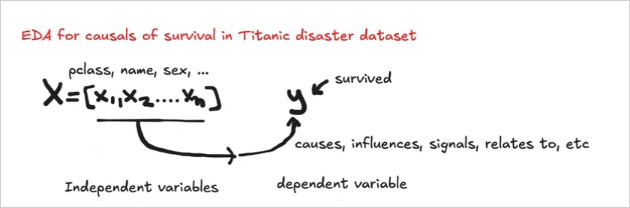


el data set del titanic se puede representar como una matrix X, compuesta de vectores (columnas), de los cuales quiero descubrir cuales de esos vectores generan una variable dependiente Y.
X son mis independent variables
Y es mi dependet variable
La relacion que va de la X a la Y, nos habla de causas, influencias, señales, relaciones, etc que determinan la dependencia.

Es decir, vamos a analizar cada una de las vectores de mi dataset (x1, x2, etc), de tal manera que pudieramos encontrar que podria, causar, influenciar, generar una señal, o relacionarse a nuestra variable dependiente y.
A esta variable dependiente y la llamaresmos "survived", ya que es lo que quiero saber. Que influyo en la supervivenvia. 
x1 = pclass
x2 = name, 
x3 = sex,
etc.


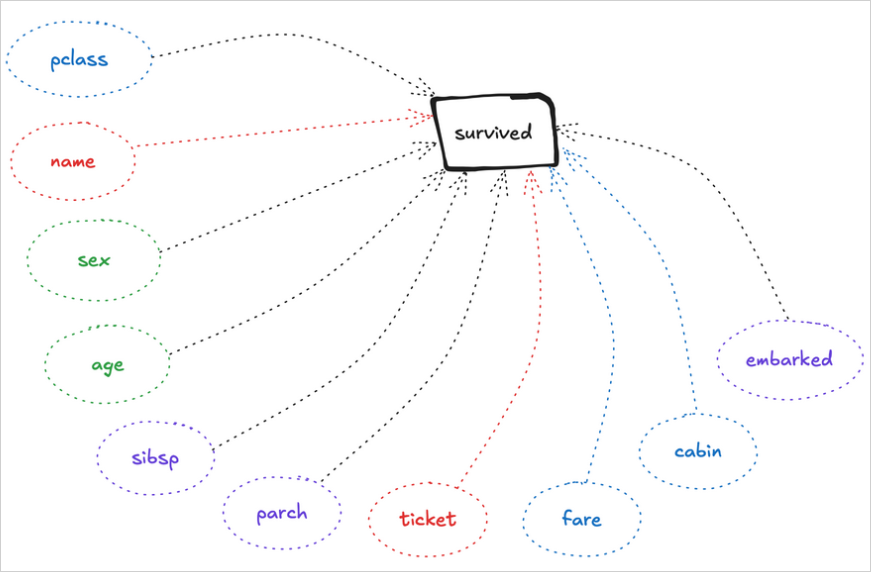


Azules:     
Estamos seguros de que estan relacionadas con otras variables. 
Ejemplo, el costo esta relacionada con la clase y la cabina, y el ticket. Hay una relacion de uno a uno entre esos vectores. Podemos ver aqui variables redundantes, y en tal caso deberiamos quitar algunas. 

Verdes:   
Las mas importantes.  
Variables que sospechamos que pueden ser influenciables y que no tienen relacion con otras.

Violetas:   
No estoy seguro si puede o no influenciar, o que relacion puede o no tener con otra variable. 

Rojos:      
Definitivamente es una variable inservible. No tienen poder interpretativo. Ya que son valores unicos.

### 🟠Step 0: Cargar Librerias.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 


import logging # crea una bitacora donde se registra cualquier incidencias de nuestro script
logger = logging.getLogger() # Inicializamos el loggin.
logger.setLevel(logging.INFO) # Le decimos que vamos a guardar todo lo que sea informacion

# Cada vez que falle algo, la maquina creara un archivo de texto donde se
# guardara cualquier incidencia que haya ocurrido.
# Esto es importante para saber cual fue el problema. 

ModuleNotFoundError: No module named 'pandas'

### 🟠Step 1: Levantamiento de Datos.

In [ ]:
url = ('https://gist.githubusercontent.com/teamtom/' + 
       '1af7b484954b2d4b7e981ea3e7a27f24/raw/' + 
       '114fb69dce56b4462a9c3a417e7402330616ad4f/' + 
       'titanic_full.csv')
df_raw = pd.read_csv(url)

🔥**Estudio la composicion del dataset**  
  
> .info():  
> vemos por arriba como esta compuesto nuestro dataset. Columnas (Observaciones), Tipo de Datos, Cantidad de nullos, etc

In [ ]:
df_raw.info()

In [ ]:
# (1) Como no tenemos el diccionario de datos, aclaramos aqui que quiere decir cada campo.
# (2) Tambien Vamos analizando si el tipo de datos es correcto o se puede optimizar.
# (3) Y por otro lado, vamos pensando si el dato tiene valor interpretatito, o al ser un dato unico, 
#     no nos aporta nada desde el punto de vista estadistico.

# Recordar que Cada columna es un vector de datos, y la consistencia debe ser 

# 🔥pclass:     
# Clase del Pasajero (Clase 1 a 3, siendo la clase 3 la mas baja)  
# Todas las variables categoricas, es mejor codificarlas como texto, y no como numero, 
# ya que genera confusiones.

# 🔥survived:   
# Indica si el pasajero sobrevivio o no. 0 = no sobrevivio. 1 = Sobrevivio.  
# Bolleano o categorico. No como numero.

# 🔥name:       
# Nombre del Pasajero
# Valor Unico, no nos estaria aportando info desde el punto de vista estadistico. No tiene poder interpretativo.
 
# 🔥sex:        
# Sexo del Pasajero
# Categoria
  
# 🔥age:        
# Edad del pasajero. 
# esta como flotante porque la columna contiene nan. 
  
# 🔥sibsp:      
# Hermanos y Esposos (sibs and )  
# Ambos datos estan completos.

# 🔥parch:      
# Papas y Niños (parents and childs)          
  
# 🔥ticket:     
# Numero de Ticket  
# Valor unico. no tiene poder interpretativo.

# 🔥fare:      
# Costo del pasaje.
# Flotante 

# 🔥cabin:     
# Si fueron o no en cabina. La cabina era solo para la clase 1  

# 🔥embarked:   
# Puerto donde embarcaron
# Hay que categorizarlo 

# 🔥boat:       
# Indica el nro de Bote donde se rescato el pasajero
# No aporta en el analisis de  supervivencia.

# 🔥body:      
#  Si el cuerpo de los no sobrevivientes fue encontrado o no.  
# No aporta en el analisis de  supervivencia.

# 🔥home.dest:  
# Destino del pasajero. Algunos iban a New York otros a Francia, etc.  
# No aporta en el analisis de  supervivencia.


🔥**Tomo una muestra aleatoria de datos:**  
  
> .sample(10, random_state=2025):
> Traemos una muestra aleatoria de 10 registros.  
> Ponemos un valor cualquiera en random_state para que si corremos otra vez el codigo, nos traiga la misma muestra, y
> asi toda la clase trabaja con los mismos valores. O todo el proyecto trabajo con los mismos ejemplos.

In [ ]:
df_raw.sample(10,random_state=2025)

### 🟠Step 2: Data preprocessing
**Objectives**:  
Perform the data cleaning, data transformation and data reduction steps to avoid data mistmatching, noisy data or data not wrangled

🔥 Copio la Base Original

In [ ]:
# lo primero que hacemos es crear una copia, para trabajar sobre ella y no modificar la base original.
# a ella se le llama df_backing, dando a entender que esta en proceso. 
# df_raw nunca se manipula. 

df_baking = df_raw.copy()

🔥 Extraemos los vectores que sabemos de antemano que no nos aportan en el EDA :boat, body, y home.dest

In [ ]:
# Extraemos las variables qeu no nos sirven, indicando si queremos sacar filas o columnas.
# El 1 es columnas, y el 0 es filas. 
df_baking = df_baking.drop(['boat','body','home.dest'], axis=1) # se eliminan las variables 

🔥 Analizamos el vector "name"

In [ ]:
# Nos fijamos si en el vector "name", todos los valores son unicos o si hay duplicados

# 1er forma:
df_baking['name'].value_counts() # Muestra una lista de todos los nombres unicos, con sus repeticiones al lado.

In [ ]:
# 2da Forma:
df_baking["name"].nunique() # Me devuelve la cantidad de valores unicos que hay, excluyendo los nan por defecto.

In [ ]:
# Como la mayoria de las valores en el vector name, son unicos, (1307 de 1309), 
# esta variable no nos va a ayudar a explicar de forma causal si influencio en la supervivencia.
# Por tal motivo sacamos esta variable del dataset, indicando si queremos sacar filas o columnas.
# El 1 es columnas, y el 0 es filas. 
df_baking = df_baking.drop(['name'], axis=1) 
df_baking.info()

🔥 Analizamos el vector Ticket

In [ ]:
# Repetimos este procedimiento con la variable ticket, para identificar si hay ticket repetidos, 
# y definir si es util o no en nuestro EDA.

df_baking['ticket'].nunique()

# 929 ticket unicos de 1309. Entonces, lo que podriamos hacer, ya que el vector ticket no nos aporta nada, 
# es generar un nuevo vector que nos diga simplemente si ese nro de ticket esta repetido o no.
# Por ejemplo, esto podria darse en casos donde toda una familia viaja con el mismo nro de ticket, para luego identificar
# si las familias que viajaron con el mismo ticket tuvieron mas chance de supervivencia o no.

In [ ]:
# Para mapear los tickets duplicados hacemos lo siguiente:
df_baking["shared_ticket"] = df_baking["ticket"].duplicated(keep=False).map({True: "yes", False:"no"})


# .duplicated(keep=False) Me dice True si es duplicado, y False si no lo es.
# .map me mapea los valores, de tal forma que si el ticket esta duplicado entonces tiene yes en shared ticket, 
# de lo contrario tiene un no.

df_baking["shared_ticket"].value_counts()

In [ ]:
# Dado de que ticket se a transformado a shared_ticket, eliminamos el vector ticket
# indicando si queremos sacar filas o columnas.
# El 1 es columnas, y el 0 es filas. 
df_baking = df_baking.drop(['ticket'], axis=1) 

🔥 Analizamos el vector "cabin"

In [ ]:
# Es en esta etapa, no solamente es el momento de eliminar variables que no nos sirven, 
# si no tambien crear variables nuevas, apoyadas en variables que son debiles para explicar algo, 
# o que directamente no explican nada por si solas.
# Hagamos el ejemplo con el vector cabinas.
df_baking['cabin'].nunique()
# Vemos que 186 de 295 valores no nulos, son unicos. 
# Dado de que son cabinas distintas, en vez de preocuparnos, si el nro de cabina es B5 o C85, podriamos crear 
# una variable nueva, que a partir de esta diga:
# Si has viajado en cabina: Yes, Si no has viajado en cabina: No.
# Los nan son los que no viajaron en cabina.
# Lo convierto en una variable binaria que solo me diga si viajo o no una cabina. 

In [ ]:
# crear variable binaria o categorica, viajas en cabina o no
df_baking['travel_cabin'] = ['no' if pd.isna(x) else 'yes' for x in df_baking['cabin']] 
df_baking["travel_cabin"].value_counts()


In [ ]:
# Dado de que cabin se a transformado a travel_cabin, eliminamos el vector cabin
# indicando si queremos sacar filas o columnas.
# El 1 es columnas, y el 0 es filas. 
df_baking = df_baking.drop(['cabin'], axis=1) 

🔥 Categorizamos las Variables necesarias. 

In [ ]:
# Categorizamos las Variables necesarias. 

df_baking['pclass'] = df_baking['pclass'].replace({1 : 'A', 2 : 'B', 3 : 'C'}) # Cuando los datos son numeros, primero debemos convertirlos a texto, por ejemplo usando un replace. De lo contrario no nos dejara cambiar el tipo a categorical.
df_baking['pclass'] = df_baking['pclass'].astype('category')
df_baking['survived'] = df_baking['survived'].replace({1: 'yes', 0 : 'no'}) # Cuando los datos son numeros, primero debemos convertirlos a texto, por ejemplo usando un replace. De lo contrario no nos dejara cambiar el tipo a categorical.
df_baking['survived'] = df_baking['survived'].astype('category')
df_baking['sex'] = df_baking['sex'].astype('category')
df_baking['embarked'] = df_baking['embarked'].astype('category')
df_baking["travel_cabin"] = df_baking["travel_cabin"].astype("category")
df_baking["shared_ticket"] = df_baking["shared_ticket"].astype("category")
df_baking # vamos viendo como esta quedando.

🔥 Hacemos un .info para ver como nos quedo la base hasta ahora

In [ ]:
df_baking.info()

🔥 **Copiamos df_baking:** 
> Luego de que terminamos de preparar nuestra base, NO OLVIDAR, hacer una copia de la misma,  
> para que no se rompa nada con los siguientes pasos.

In [ ]:
df = df_baking.copy()

### 🟠Step 3: Exploratory Data Analysis
**Objective**:   
Summarize the main characteristics of the dataset using descriptive statistics and data visualization methods

No es comun que para hacer un EDA se utilicen todos los datos. 
Y esta es una de las diferencias mas marcadas entre un data analyst y data scientist. 
En el area de bussiness analytics o data analitics, se trabajan todos los datos de una vez, ya que estamos contando lo qeu sucedio. Estamos analizando datos historicos.

En DS no es asi. 
En data science vamos a hacer un analisis que va a tratar de probar una hipotesis, con los datos que tenemos, y con datos nuevos que podrian venir. 


En el area de DS buscamos dar explicaciones y demostrar ciertas hipotesis.
No puedo demostrar una hipotesis sobre todos los datos, porque aun no se que ocurrira si vinieran datos nuevos.
Por tal motivo, hacemos una particion de los datos para usar

    1. un poco para la prueba de nuestras hipotesis, y 
    2. otro poco para comprobar como realmente se hubiera comportado si hubiera tenido datos nuevos.

Alguien podria decir, profesor! pero el dataset del titanic tiene datos historicos.
Y la respuesta seria que:  Si. Es historico. Sin embargo, estamos tratando de probar que existe la hipotesis de causalidad en los sobrevivientes. Por este motivo, necesitamos un poco de datos ocultos, para ver como se comportan vs mi hipotesis. 


🔥 **Hacemos la particion de los datos de forma controlada** 

> Las particiones se llamaran:  
>   * df_train:   Con el se realizara el ANALISIS completo y se realizara la PRUEBA DE HIPOTESIS.  
>   * df_test:    Con el haremos la PRUEBA DE RESISTENCIA.

In [ ]:
'''Dividir el DataFrame en entrenamiento y prueba'''

df_train, df_test = train_test_split(df, random_state=2025, test_size= 0.2, stratify=df['survived'])

    # 🔹 train_test_split(df, ...)
    #     train_test_split es una función de scikit-learn (sklearn.model_selection) que divide un DataFrame en dos conjuntos: 
    #     entrenamiento (df_train) y prueba (df_test).

    # 🔹 Parámetros:
    #     → df: 
    #       El DataFrame original que queremos dividir.
    #
    #     → random_state=2025: 
    #       Fija la semilla aleatoria para que la división sea reproducible 
    #       (si ejecutas el código varias veces, obtendrás la misma división).
    #
    #     → test_size=0.2: 
    #       El 20% de los datos (0.2) se asignará al conjunto de prueba (df_test), 
    #       y el 80% restante (0.8) será para entrenamiento (df_train).
    #
    #     → stratify=df['survived']: 
    #       Asegura que la distribución de la variable objetivo ('survived') sea similar en ambos conjuntos (entrenamiento y prueba). 
    #       Útil cuando la variable objetivo está desbalanceada, como en un problema de clasificación.
    #       En este caso, la proporcion de sobrevivientes en ambas particiones sera la misma. 


In [ ]:
'''Reiniciar los índices del conjunto de entrenamiento'''

df_train = df_train.reset_index(drop=True)

    # → Después de dividir los datos, los índices del DataFrame pueden quedar desordenados (porque train_test_split selecciona filas aleatoriamente).
    # → reset_index(drop=True) restablece los índices a una secuencia continua (0, 1, 2, ...).
    # → drop=True evita que el índice anterior se convierta en una columna.


🔥Overview de la estructura conjunto de entrenamiento con .info()

In [ ]:
df_train.info()

🔥Overview del dataset del conjunto de entrenamiento

In [ ]:
df_train

🔥Distribucion de Variables Numericas

In [ ]:
'''Vemos rápidamente la distribución de las variables numéricas.'''

display(df_train.describe(include='number').T)

    # 🔹 ¿Qué hace?
    #   
    #     → df_train.describe(include='number') 
    #       devuelve estadísticas solo para columnas numéricas.
    #     
    #     → .T 
    #       (transposición) convierte las filas en columnas para mejorar la visualización en Jupyter Notebook.
    #     
    #     → display() 
    #       muestra la tabla de forma más clara.

    # 🔹 ¿Qué columnas se incluyen?
    #     → Solo aquellas con tipos de datos numéricos (int64, float64).

    # 🔹 ¿Qué significan las métricas?
    #        count → Cantidad de valores no nulos.
    #        mean → Promedio.
    #        std → Desviación estándar (variabilidad de los datos).
    #        min → Valor mínimo.
    #        25% → Percentil 25 (cuartil 1).
    #        50% → Mediana (percentil 50).
    #        75% → Percentil 75 (cuartil 3).
    #        max → Valor máximo.


In [ ]:
'''CONCLUSION:'''

# Viendo esta distribucion, podemos afirmar que:

# AGE:
    # el valor promedio de edad era de 30 años, 
    # con una desviacion estandar alta de 14, ya que habian bastantes niños.
    # me doy cuenta de eso mirando los min y max y los cuartiles:
        # La edad minima era 0.17 (bebe)
        # La edad maxima de los pasajeros era de 80 años
        # La mediana de la edad es de 28 años. (Cuartil 50%)
        # El cuartil 1 es 21 años
        # El cuartil 3 es 39 años
        # Si resto 38 - 21 = 17 = Rango Intercuartil

# SIBSP: (Hermanos y Esposos)
    # el valor promedio de personas con hermanos y parejas era de 0.49. La mitad tenia hermanos o esposos y la otra mitad no. Tecnicamente muestra la proporcion.
    # En el cuartil 3, recien vemos un 1, ya que hay alguien que tiro los datos muy arriba.
    # El max es de 8. 

# PARCH: (Padres y Niños)
    # El valor promedio de personas con padres e hijos era del 38%. O sea que habia mas personas con hermanos y esposos, que papas con niños.
    # Pero este valor esta muy sesgado, ya que los tres cuartiles estan en 0, y el maximo esta en un valor extremo 9. 
    # el problema del promedio, es que si tiene un valor extremo, no lo descarta, y ese valor golpea mucho el resultado del promedio.
    # La mediana (cuartil 50%) nos dice que no hay papas con niños. Sin embargo, si hay alguien que tenia muchos hijos y por eso aparece el 9.

# FARE:
    # El min = 0, o sea que alguien viajo gratis.
    # La mediana es 14, con un Cuartil 1 y 13 de 7 y 31. 
    # El maximo = 512, siendo el promedio 33. Asi que alguien pago muchisimo.
    # Es por eso que es importante ver la mediana y la media. Ya que seguramente la media se reconra castigo. 
    # De hecho si vemos la media = 33, y esta muy disparada de la mediana que es igual a 14. 
    # Ese es el problema de los promedios. Un valor extremos golpea mucho los promedios.



🔥Distribucion de Variables Categoricas

In [ ]:
''' Veremos la distribución de variables categóricas, para detectar desbalances y revisar valores más frecuentes. '''

display(df_train.describe(include='category').T)

    # 🔹 ¿Qué hace?
    #
    #     → df_train.describe(include='category') 
    #       devuelve estadísticas descriptivas solo para columnas categóricas. 
    #
    #     →.T 
    #       transpone la tabla para mejorar la lectura.
    #
    #     → display() 
    #       permite verla bien en Jupyter Notebook.

    # 🔹 ¿Qué columnas se incluyen?
    #     → Solo aquellas con tipo de datos category en pandas.

    # 🔹 ¿Qué significan las métricas?
    #        count → Número total de valores no nulos.
    #        unique → Cantidad de valores únicos en la columna.
    #        top → El valor más frecuente.
    #        freq → Número de veces que aparece el valor más frecuente.

In [ ]:
'''CONCLUSION:'''
# pclass: La clase Mayoritaria es la C
# survived: Vemos que el top es No. o sea que murio mas gente de la que sobrevivio.
# sex: El sexo predominante son los hombres
# embarked: El puerto S es donde mas personas embarcaron.
# shared_ticket: si bien muchos no iban con ticket compartido, se puede decir que casi el 50% si tenia ticket compartido.
# travel_cabin: La mayoria de los pasajeron no iban en cabina. 80% casi.

🔥Analisis Semivariado (Histograma) | Analisis de Datos Numericos

In [ ]:
'''Analisis Semivariado | HISTOGRAMA'''
# El HISTOGRAMA solo aplicara a valores numericos

df_train.hist()

    # 🔹 ¿Qué hace?
    #     Genera histogramas para todas las columnas numéricas del DataFrame df_train.
    #     Un histograma es un gráfico de barras que muestra la distribución de una variable numérica.
    #     Internamente, pandas usa matplotlib.pyplot para graficar los histogramas.

    # 🔹 ¿Cómo funciona?
    #     Recorre todas las columnas numéricas del DataFrame.
    #     Agrupa los valores en intervalos (bins).
    #     Cuenta la cantidad de valores en cada intervalo y los representa con barras.
    #     El eje x representa los valores de la variable
    #     El eje y representa cuántos pasajeros caen en cada rango de la variable.

plt.show() # Muestra los gráficos generados por df_train.hist().

In [ ]:
#CONCLUSION:

# AGE:
    # La edad esta mas distribuida hacia la izquierda. Sesgo positivo.
    # A simple vista, pareciera que la edad de los niños no esta bien registrada, ya que esta muy pareja.

# SIBSP:
    # Sesgo altamente positvo, y por ahi hay alguno con 4 o 8.

# PARCH:
    # Sesgo altamente positvo, pero la gran mayoria 0. Por ahi alguno con 1 y 2,
    #  y aparece tambien la barrita con alguno entre 4 y 5.

# FARE:
    # Variable con alto sesgo. La gran mayoria estuvo pagando al rededor de 30 unidades monetarias.
    # Y por ahi se ve un tipo que pago como 800 unidades monetarias, que era el maximo. 

🔥 Analisis de Datos Categoricos

In [ ]:
'''Procederemos con el Conteo de Datos Categoricos'''

fig, ax = plt.subplots(3,2) 
    # Como es una tupla, luego de la coma de fig va un espacio.
    # plt.subplots(3,2) crea una figura (fig) con una rejilla de subgráficos (subplots) de 3 filas y 2 columnas.
    # ax es un array bidimensional que almacena los 6 ejes de los gráficos (porque 3x2 = 6).
    # Cada ax[i, j] representa un espacio donde se ubicará un gráfico.


sns.countplot(data = df_train, y = 'survived', ax = ax[0,0])
    #   sns.countplot() 
    #   → genera un gráfico de barras mostrando la cantidad de registros para cada categoría en la columna 'survived'.

    #   data=df_train 
    #   → Usa el DataFrame df_train como fuente de datos.

    #   y='survived' 
    #   → Cuenta cuántos valores hay en cada categoría de survived (0 = no sobrevivió, 1 = sobrevivió).
    #   → Le decimos cual es la variable para la que haremos el conteo.
    
    #   ax=ax[0,0] 
    #   → Dibuja este gráfico en la posición superior izquierda de la rejilla.
    #   → Le decimos en que parte de la cuadricula queremos ubicar ese grafico.
    

sns.countplot(data = df_train, y = 'sex', ax = ax[0,1])
sns.countplot(data = df_train, y = 'pclass', ax = ax[1,0])
sns.countplot(data = df_train, y = 'embarked', ax = ax[1,1])
sns.countplot(data = df_train, y = 'travel_cabin', ax = ax[2,0])
sns.countplot(data = df_train, y = 'shared_ticket', ax = ax[2,1])

plt.show()

In [ ]:
#CONCLUSION:

# Survived:
# Vemos claramente que la mayoria no sobrevivio.

# pclass:
# Muestra que la mayoria de pasajeros iban en clase C

# travel_cabin:
# muestra que la mayoria de pasajeros no tenian cabina

# sex:
# muestra facilmente que la mayoria eran hombres

# embarked:
# muestra que la mayoria embarcaron en el puerto S

# shared_ticket:
# muestra que estaba bastante balanceada la cantidad de pasajeros que tenian ticket compartido y los que no.


🔥Es la hora de la Verdad: Analizaremos el efecto de cada variable numerica sobre la supervivencia

📌 Explicación de sns.pairplot()

pairplot() es una función de Seaborn que genera una matriz de gráficos de dispersión (scatter plots), mostrando la relación entre todas las variables numéricas de un DataFrame.

1️⃣ Parámetros clave

sns.pairplot(data=df_train, hue='survived')

🔹 data=df_train → Usa df_train como fuente de datos.  
🔹 hue='survived' → Colorea los puntos según la variable survived (0 o 1).

    Esto permite ver si hay patrones en la distribución de sobrevivientes vs. no sobrevivientes en relación con otras variables numéricas.

2️⃣ ¿Cómo funciona pairplot()?

    Selecciona solo las columnas numéricas del DataFrame df_train.
    Cruza cada variable numérica con todas las demás, generando gráficos de dispersión entre cada par de variables.
    En la diagonal, muestra histogramas para ver la distribución de cada variable individualmente.

📌 **Ejemplo de DataFrame (`df_train`) con variables numéricas:**

| survived | age| fare  | pclass |
|----------|----|------ |--------|
| 0        | 22 | 7.25  | 3      |
| 1        | 38 | 71.28 | 1      |
| 1        | 26 | 8.05  | 3      |
| 0        | 35 | 53.1  | 1      |
| 1        | 27 | 11.13 | 2      |

📊 **Gráfico generado (`pairplot` con `hue='survived'`):**

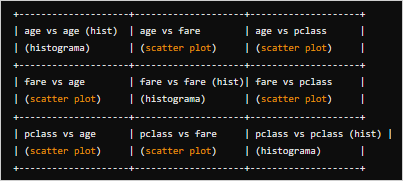

💡 Interpretación:

    Cada celda representa un gráfico de dispersión entre dos variables.
    Los colores muestran si la persona sobrevivió (hue='survived') o no.
    En la diagonal, hay histogramas de cada variable.


3️⃣ ¿Cómo mejora el análisis?

    Permite detectar correlaciones entre variables.
    Ayuda a ver patrones en los sobrevivientes vs. no sobrevivientes.
    Si algunos grupos se separan bien en los gráficos, esas variables podrían ser buenas predictoras para un modelo de Machine Learning.

Ejemplo:

    Si los sobrevivientes (survived=1) están mayormente en pclass=1 y tienen fare alto, podemos inferir que las personas en primera clase tenían más probabilidad de sobrevivir.

In [ ]:
# ACA VAMOA A PROBAR EL EFECTO DE CADA VARIABLE SOBRE LA SUPERVIVENCIA (variable dependiente)

sns.pairplot(data = df_train, hue= 'survived') 
# cruza dos variables, la dependiente con cada numerica. 
# a la variable dependiente la va a pintar de un color.

    # 📌 ¿Qué hace?
    #       Cruza todas las variables numéricas con gráficos de dispersión (scatter plots).
    #       Colorea los puntos según survived, ayudando a identificar patrones.
    #       Muestra histogramas en la diagonal, permitiendo analizar la distribución de cada variable.

    # ✅ Conclusión: 
    #       sns.pairplot() es una excelente herramienta para visualizar relaciones entre variables 
    #       numéricas durante un Análisis Exploratorio de Datos (EDA).

plt.show()

# TENIENDO EN CUENTA QUE LOS GRAFICOS MUESTRAN SOBREVIVIENTES (NARANJA) VS NO SOBREVIVIENTES (AZUL), DEBEMOS ANALIZARLOS TRATANDO DE IDENTIFICAR CUAN SEPARADOS ESTAN, 
# SOBRE TODO EN LOS GRAFICOS DE LA DIAGONAL. PARA ESTO MIRO:
#   → SI LOS EXTREMOS DE LAS MONTAñAS ESTAN SEPARADOS O COINCIDEN SOBRE EL EJE X 
#   → SI LOS PICOS (tambien llamado puntas) DE LAS MONTAñAS ESTAN SEPARADOS SOBRE EL EJE X, O SEA EN RANGOS DISTINTOS DEL EJE X. 
# CUANTO MAS SEPARADOS MEJOR.

# LA ALTURA DE LOS MONTAñAS NO ME DICE MUCHO:
# La altura de las montañas no me dice mucho, por lo tanto no lo tomo en cuenta. Simplemente observamos que la azul (no sobrevivientes), esta mas alta en todos los graficos, 
# porque hubieron mas sobrevivientes que no sobrevivientes.
# Por lo tanto, no buscaremos si un pico esta mas elevado que el otro. Si no que buscaremos si esos picos estan separados, horizontalmente hablando.

In [ ]:
# CONCLUSION:

# 1ER GRAFICO DE LA DIAGONAL: AGE. 
# Ambas montañas estan superpuestas SOBRE EL EJE X, tanto sus colas, como su pico.
# Por lo tanto este grafico nos dice que la edad, no vario mucho entre sobrevivientes y no sobrevivientes.


# 2do GRAFICO DE LA DIAGONAL: SIBSP (Hermanos)
# La cola azul esta llena de no sobrevivientes, por lo que si tenia hermanos, seguramente no sobrevivio. 


# 3er GRAFICO DE LA DIAGONAL: PARCH (Hijos)
# La cola azul esta llena de no sobrevivientes, o sea que el que la mayoria de padres con hijos no sobrevivieron.

# 4to GRAFICO DE LA DIAGONAL: FARE (Precio)
# En este grafico, notamos que si bien los picos de las montañas coinciden en el eje X, las colas de las mismas, si estan ditanciadas.
# Se observa que el rango de precios de los no sobrevivientes, alcanza un maximo de 300 aprox (eje x)
# Mientras que el rango de precios de los sobrevivientes llega a mas de 500 (eje x) 
# Por lo tanto, el que pago mas, sobrevivio. 

🔥 Ahora: Analizaremos el efecto de cada variable categorica sobre la supervivencia

In [ ]:
fig, ax = plt.subplots(3,2)
sns.countplot(data = df_train, y = 'embarked', hue='pclass', ax = ax[0,0])
sns.countplot(data = df_train, y = 'sex', hue='survived', ax = ax[0,1])
sns.countplot(data = df_train, y = 'pclass', hue='survived', ax = ax[1,0])
sns.countplot(data = df_train, y = 'embarked', hue='survived', ax = ax[1,1])
sns.countplot(data = df_train, y = 'travel_cabin', hue='survived', ax = ax[2,0])
sns.countplot(data = df_train, y = 'shared_ticket', hue='survived', ax = ax[2,1])
plt.show()

In [ ]:
# Crear la figura con 3 filas y 2 columnas
fig, ax = plt.subplots(3, 2, figsize=(12, 11))

# Graficar en cada subplot
sns.countplot(data=df_train, y='embarked', hue='pclass', ax=ax[0, 0])
sns.countplot(data=df_train, y='sex', hue='survived', ax=ax[0, 1])
sns.countplot(data=df_train, y='pclass', hue='survived', ax=ax[1, 0])
sns.countplot(data=df_train, y='embarked', hue='survived', ax=ax[1, 1])
sns.countplot(data=df_train, y='travel_cabin', hue='survived', ax=ax[2, 0])
sns.countplot(data=df_train, y='shared_ticket', hue='survived', ax=ax[2, 1])

# Lista de títulos para cada gráfico
titles = [
    "Pasajeros por Puerto de Embarque y Clase", "Supervivencia por Género",
    "Supervivencia por Clase", "Supervivencia por Puerto de Embarque",
    "Supervivencia por Cabina de Viaje", "Supervivencia por Boleto Compartido"
]

# Ajustes para cada gráfico
for i, ax in enumerate(ax.flat):
    ax.set_title(titles[i], fontsize=12,fontweight='bold', ha='left', x=0)  # Título de cada gráfico
    ax.set_ylabel("")  # Ocultar etiquetas del eje Y para ahorrar espacio
    ax.set_xlabel("")  # Ocultar etiquetas del eje X para más limpieza
    
    # Mover la leyenda dentro del gráfico
    ax.legend(loc="best", fontsize=9)  # "best" elige la mejor posición dentro del gráfico

# Agregar título general
plt.suptitle("Análisis de Supervivencia del Titanic", fontsize=16, fontweight='bold')

# Ajustar el espaciado entre subgráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Reservamos más espacio para el título

# Mostrar el gráfico
plt.show()


#### 📊 Análisis de Supervivencia del Titanic

##### 🔹 Pasajeros por Puerto de Embarque y Clase  
✔ Southampton fue el puerto de embarque más común, con mayoría de pasajeros en tercera clase.  
✔ Cherburgo tenía más pasajeros de primera clase.  

##### 🔹 Supervivencia por Género
✔ La mayoría de los hombres no sobrevivieron, mientras que la mayoría de las mujeres sí.  
✔ Se confirma la política de *"mujeres y niños primero"*.  

##### 🔹 Supervivencia por Clase
✔ Los pasajeros de primera clase tenían más probabilidades de sobrevivir.  
✔ La tercera clase tuvo la mayor cantidad de pasajeros, pero la menor tasa de supervivencia.  

##### 🔹 Supervivencia por Puerto de Embarque
✔ Los pasajeros de Cherburgo tuvieron mejores tasas de supervivencia, posiblemente por una mayor presencia de primera clase.  
✔ Southampton tuvo la mayor cantidad de pasajeros, pero la mayoría no sobrevivió.  

##### 🔹 Supervivencia por Cabina de Viaje
✔ Tener una cabina asignada aumentaba las probabilidades de supervivencia.  
✔ Los pasajeros sin cabina fueron la mayoría y también tuvieron la mayor tasa de mortalidad.  

##### 🔹 Supervivencia por Boleto Compartido
✔ Compartir boleto pudo haber sido una ventaja en términos de apoyo social o ubicación en el barco.  
✔ Los pasajeros con boletos compartidos tuvieron mayores tasas de supervivencia.  

---

#### 📌 Conclusiones Generales
✔ **Las mujeres tenían muchas más probabilidades de sobrevivir que los hombres.**  
✔ **Los pasajeros de primera clase tenían más probabilidades de sobrevivir que los de tercera.**  
✔ **El puerto de embarque influía en la supervivencia, con Cherburgo mostrando mejores tasas.**  
✔ **Tener una cabina asignada y compartir boleto aumentaban las probabilidades de sobrevivir.**  


In [ ]:
# NOTA IMPORTANTE DESDE EL PUNTO DE VISTA ESTADISTICO. 

# CORRELACION VS CAUSACION:
# La correlacion de variables, no implica la causacion. 
# Por mas que dos variables tengan correlacion, no podemos afirmar que sea la causa, puede que si como no.
# No podemos probar que es la causa directa. Solamente podemos decir que tuvo o no cierta influencia.


# LO SEGUNDO QUE TENEMOS QUE UBICAR SON LOS COUNFAOUNDERS (Confundidores)
# Ejemplo:
# Hay una relacion entre numero de helados vendidos vs cantidad de personas en la playa.
# Pareciera que cuanto mas gente hay en la playa mas helados se venden.
# Pero el helado no es lo que genera que mas gente vaya a la playa. Mas bien que la gente que ya esta 
# en la playa compra el helado.
# Lo que genera que la gente compre mas helado, es que haga mas calor.
# Entonces, lo otro que debemos invetigar, es si hay alguna variable que nos confunda.

# Por este motivo, vamos a tratar de identificar si la clase y el puerto de embarque estan amarrados. 
# ya que pareciera que estas categorias no influyen directamente en la causa de supervivencia. 

#### 🔥 Análisis de Supervivencia del Titanic

##### 💡 Pasajeros por Puerto de Embarque y Clase
✔ Hay una relación entre el puerto de embarque y la clase del pasajero.  
✔ Southampton tuvo la mayor cantidad de pasajeros, en su mayoría de tercera clase.  
✔ Cherburgo tuvo una mayor proporción de pasajeros de primera clase.  

⚠ **Posible factor de confusión:**  
El puerto de embarque por sí solo no explica la supervivencia, pero podría estar relacionado con la clase social del pasajero, lo que sí influye en la supervivencia.  

##### 💡 Supervivencia por Género
✔ Se observa que las mujeres tienen una mayor tasa de supervivencia en comparación con los hombres.  
✔ Esta diferencia sugiere la posible influencia de políticas como *"mujeres y niños primero"*.  

⚠ **Correlación, no causación:**  
El género está fuertemente asociado a la supervivencia, pero no podemos afirmar que sea la única causa. Otras variables como la **clase social** y el **grupo familiar** también pueden influir.  

##### 💡 Supervivencia por Clase
✔ Los pasajeros de primera clase tenían una mayor tasa de supervivencia.  
✔ La tercera clase tenía la mayor cantidad de pasajeros y también la menor tasa de supervivencia.  

⚠ **Posible factor de confusión:**  
El acceso a los botes salvavidas, la ubicación de las cabinas y otros factores pudieron influir en la relación entre clase y supervivencia.  

##### 💡 Supervivencia por Puerto de Embarque
✔ Los pasajeros de Cherburgo tuvieron una mayor tasa de supervivencia en comparación con Southampton y Queenstown.  

⚠ **Posible confusión con la clase social:**  
Es posible que el puerto de embarque no influya directamente en la supervivencia, sino que esté correlacionado con la **clase social del pasajero**, lo que a su vez afecta la probabilidad de sobrevivir.  

##### 💡 Supervivencia por Cabina de Viaje
✔ Se observa que los pasajeros con cabina asignada tienen una mayor tasa de supervivencia.  
✔ La mayoría de los pasajeros sin cabina asignada no sobrevivieron.  

⚠ **Factores no considerados:**  
Tener cabina podría estar relacionado con la clase social y la ubicación dentro del barco, lo que puede haber influido en el acceso a los botes salvavidas.  

##### 💡 Supervivencia por Boleto Compartido
✔ Los pasajeros que compartieron boleto tuvieron una mayor tasa de supervivencia en comparación con los que viajaban solos.  

⚠ **Posibles explicaciones alternativas:**  
La presencia de familiares o grupos pudo haber facilitado la supervivencia. También podría haber diferencias en el acceso a información o ayuda entre quienes viajaban solos y en grupo.  

---

#### 📌 Conclusiones Generales
✔ **El género, la clase social y la estructura del grupo de viaje parecen estar correlacionados con la supervivencia.**  
✔ **El puerto de embarque podría no ser un factor causal, sino estar asociado a la clase social.**  
✔ **El análisis no prueba causalidad, solo correlaciones.**    
